In [82]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [83]:
# lee los numeros
numeros = skdata.load_digits()


In [84]:
# lee los labels
target = numeros['target']


In [85]:

# lee las imagenes
imagenes = numeros['images']

In [86]:

# cuenta el numero de imagenes total
n_imagenes = len(target)

In [87]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))


In [88]:
# Split en train/test
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)


In [89]:
# todo lo que es diferente de 1 queda marcado como 0
y_train[y_train!=1]=0
y_test[y_test!=1]=0


In [90]:
# Reescalado de los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [91]:
# Encuentro los autovalores y autovectores de las imagenes marcadas como 1.
numero = 1
dd = y_train==numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)


In [92]:
# pueden ser complejos por baja precision numerica, asi que los paso a reales
valores = np.real(valores)
vectores = np.real(vectores)

In [93]:
# reordeno de mayor a menor
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

In [94]:
# encuentro las imagenes en el espacio de los autovectores
x_test_transform = x_test @ vectores
x_train_transform = x_train @ vectores

In [95]:
# inicializo el clasificador
linear = LinearDiscriminantAnalysis()

In [96]:
# numero de componentes a utilizar, de 3 a 40.
n_comp = np.arange(3,41)

In [97]:
# arrays para guardar valores de f1
f1_test_unos = np.ones(len(n_comp))
f1_train_unos = np.ones(len(n_comp))
f1_test_otros = np.ones(len(n_comp))
f1_train_otros = np.ones(len(n_comp))

In [98]:
for i, n_components in enumerate(n_comp):
    # encuentro los parametros del clasificador
    linear.fit(x_train_transform[:,:n_components], y_train)
    
    # predigo los valores para train
    y_predict_train = linear.predict(x_train_transform[:,:n_components])
    
    # predigo los valores para test
    y_predict_test = linear.predict(x_test_transform[:,:n_components])

    #calculo F1-score
    f1_test_unos[i] = sklearn.metrics.f1_score(y_test, y_predict_test, pos_label=1)
    f1_train_unos[i] = sklearn.metrics.f1_score(y_train, y_predict_train, pos_label=1)
    f1_test_otros[i] = sklearn.metrics.f1_score(y_test, y_predict_test, pos_label=0)
    f1_train_otros[i] = sklearn.metrics.f1_score(y_train, y_predict_train, pos_label=0)


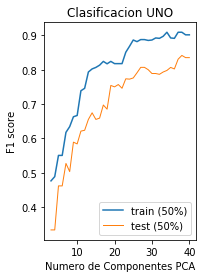

In [99]:
# hago la grafica
plt.figure()
plt.subplot(1,2,1)
plt.plot(n_comp, f1_train_unos, label='train (50%)')
plt.plot(n_comp, f1_test_unos, lw=1, label='test (50%)')
plt.title('Clasificacion UNO')
plt.xlabel('Numero de Componentes PCA')
plt.ylabel('F1 score')
plt.legend()

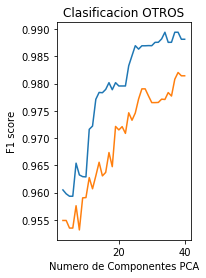

In [100]:
plt.subplot(1,2,2)
plt.plot(n_comp, f1_train_otros)
plt.plot(n_comp, f1_test_otros)
plt.title('Clasificacion OTROS')
plt.xlabel('Numero de Componentes PCA')
plt.ylabel('F1 score')

plt.subplots_adjust(wspace=0.5)

#plt.savefig('F1_score_LinearDiscriminantAnalysis.png')

In [113]:
#y_true = np.array([0, 0, 1, 1],[0, 0, 1, 1])
#y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_scores)
linear.fit(x_train_transform[:,:10],y_train)
p_train2=linear.predict_proba(x_test_transform[:,:10])
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test,p_train2[:,0])
#plt.plot(p_train2[0],p_train2[1])

In [ ]:
#y_true = [[0, 0, 1, 1],[0, 0, 1, 1],[0, 0, 1, 1]]
#linear.predict_proba(y_true)

#np.shape(x_train_transform[:,:40])
#linear.predict_proba(
len(x_train_transform[0])
#len(p_train2)
print(np.matrix.transpose(x_train_transform)[:,:40])
np.shape(p_train2)
print(p_train2)

In [128]:
precision

array([0.10122358, 0.10022272, 0.09921962, 0.09821429, 0.0972067 ,
       0.09731544, 0.09630459, 0.09529148, 0.09427609, 0.09325843,
       0.09336333, 0.09234234, 0.09131905, 0.09029345, 0.09039548,
       0.09049774, 0.09060023, 0.09070295, 0.08967083, 0.08977273,
       0.0887372 , 0.08769932, 0.08779932, 0.08789954, 0.08685714,
       0.08581236, 0.08591065, 0.08486239, 0.08381171, 0.08390805,
       0.0840046 , 0.08410138, 0.08304498, 0.08198614, 0.08092486,
       0.08101852, 0.07995365, 0.0800464 , 0.07897793, 0.07906977,
       0.07799767, 0.07692308, 0.07584597, 0.07476636, 0.07368421,
       0.07259953, 0.07151231, 0.07042254, 0.0693302 , 0.06823529,
       0.06831567, 0.06839623, 0.06847698, 0.06737589, 0.06627219,
       0.06516588, 0.06405694, 0.06294537, 0.06183115, 0.06071429,
       0.06078665, 0.05966587, 0.05973716, 0.05861244, 0.05868263,
       0.05755396, 0.05642257, 0.05649038, 0.05535499, 0.05421687,
       0.053076  , 0.0531401 , 0.05320435, 0.05205811, 0.05090

In [129]:
recall


array([1.        , 0.98901099, 0.97802198, 0.96703297, 0.95604396,
       0.95604396, 0.94505495, 0.93406593, 0.92307692, 0.91208791,
       0.91208791, 0.9010989 , 0.89010989, 0.87912088, 0.87912088,
       0.87912088, 0.87912088, 0.87912088, 0.86813187, 0.86813187,
       0.85714286, 0.84615385, 0.84615385, 0.84615385, 0.83516484,
       0.82417582, 0.82417582, 0.81318681, 0.8021978 , 0.8021978 ,
       0.8021978 , 0.8021978 , 0.79120879, 0.78021978, 0.76923077,
       0.76923077, 0.75824176, 0.75824176, 0.74725275, 0.74725275,
       0.73626374, 0.72527473, 0.71428571, 0.7032967 , 0.69230769,
       0.68131868, 0.67032967, 0.65934066, 0.64835165, 0.63736264,
       0.63736264, 0.63736264, 0.63736264, 0.62637363, 0.61538462,
       0.6043956 , 0.59340659, 0.58241758, 0.57142857, 0.56043956,
       0.56043956, 0.54945055, 0.54945055, 0.53846154, 0.53846154,
       0.52747253, 0.51648352, 0.51648352, 0.50549451, 0.49450549,
       0.48351648, 0.48351648, 0.48351648, 0.47252747, 0.46153

In [126]:
len(thresholds)

899

No handles with labels found to put in legend.


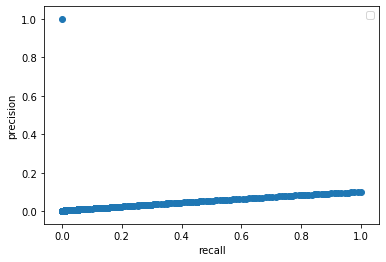

In [131]:
plt.figure()
#plt.subplot(1,2,1)
plt.scatter(recall, precision)#, label='train (50%)')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.savefig("pres_rec.png")